In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# read data function 

In [2]:
def read_abcd(path, cols, na_values):
    
    df = pd.read_csv(path, sep='\t', index_col='subjectkey', na_values=na_values)
    df = df.drop(df.index[0])
    
    for col in cols:
        df[col] = pd.to_numeric(df[col])
        df = df[cols]

    df = df.reset_index()
    df = df.sort_values(['subjectkey', 'interview_age'])
    df = df.drop_duplicates(subset=['subjectkey'], keep='first')
    df = df.drop(columns=['interview_age'])
    df = df.set_index('subjectkey')
    
    df_show = abcd_ysu02.join(df)
    df_show = df_show.drop(columns=[
        'isip_1d_2',
        'isip_5_2',
        'isip_1b_yn'
    ])
     
    for col in df_show.columns:
        print('{:<30}    n = {:<10}    mean = {:<10.4f}'.\
              format(col,  df_show[col].notnull().sum(), df_show[col].mean()))    
    print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))
    
    return df

# y target variable

In [3]:
file_abcd_ysu02 = r'E:\gregn\data\ABCD\abcd3\abcd_ysu02.txt'
abcd_ysu02 = pd.read_csv(file_abcd_ysu02, sep='\t', index_col='subjectkey')
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02.index[0])
cols = [
    'interview_age',
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
]

for col in cols:
    abcd_ysu02[col] = pd.to_numeric(abcd_ysu02[col])
    abcd_ysu02 = abcd_ysu02[cols]
    
abcd_ysu02 = abcd_ysu02.reset_index()
abcd_ysu02 = abcd_ysu02.sort_values(['subjectkey', 'interview_age'])
abcd_ysu02 = abcd_ysu02.drop_duplicates(subset=['subjectkey'], keep='first')
abcd_ysu02 = abcd_ysu02.drop(columns=['interview_age'])
abcd_ysu02 = abcd_ysu02.set_index('subjectkey')
    
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 3].index) # drop accidental 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_5_2 == 2].index) # drop sneaky 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1b_yn == 0].index) # drop religious 
abcd_ysu02 = abcd_ysu02.drop(abcd_ysu02[abcd_ysu02.isip_1d_2 > 10].index) 

abcd_ysu02['isip_1d_2'] = abcd_ysu02['isip_1d_2'].fillna(0)

y = abcd_ysu02['isip_1d_2'].values
y = np.where(y>0, 1, y)

unique, counts = np.unique(y, return_counts=True)

print('number of subjects: {:>10}\n\n[0] never sipped: {:>12}\n[1] sipped by age 10:{:>9}'.\
      format(len(y), counts[0], counts[1]))

number of subjects:      10707

[0] never sipped:         9209
[1] sipped by age 10:     1498


# abcd_tbss01 

In [4]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_tbss01.txt'

cols = [
    'interview_age',
    'nihtbx_picvocab_fc',
    'nihtbx_flanker_fc',
    'nihtbx_list_fc',
    'nihtbx_cardsort_fc',
    'nihtbx_pattern_fc',
    'nihtbx_picture_fc',
    'nihtbx_reading_fc',
    'nihtbx_fluidcomp_fc',
    'nihtbx_cryst_fc',
    'nihtbx_totalcomp_fc',
]

na_values = [None]
abcd_tbss01 = read_abcd(path, cols, na_values)

nihtbx_picvocab_fc                n = 9986          mean = 52.2267   
nihtbx_flanker_fc                 n = 9981          mean = 46.0127   
nihtbx_list_fc                    n = 9945          mean = 49.3761   
nihtbx_cardsort_fc                n = 9984          mean = 47.3935   
nihtbx_pattern_fc                 n = 9967          mean = 45.2361   
nihtbx_picture_fc                 n = 9976          mean = 49.4500   
nihtbx_reading_fc                 n = 9976          mean = 49.2431   
nihtbx_fluidcomp_fc               n = 9791          mean = 45.7027   
nihtbx_cryst_fc                   n = 9842          mean = 50.8272   
nihtbx_totalcomp_fc               n = 9788          mean = 47.6174   

subjects:     10707
features:        10


# lmtp201

In [5]:
path = r'E:\gregn\data\ABCD\abcd3\lmtp201.txt'

cols = [
    'interview_age',
    'lmt_scr_perc_correct',
    'lmt_scr_rt_correct',
]

na_values = [None]
lmtp201 = read_abcd(path, cols, na_values)

lmt_scr_perc_correct              n = 10398         mean = 0.5870    
lmt_scr_rt_correct                n = 10392         mean = 2660.7517 

subjects:     10707
features:         2


In [6]:
lmtp201['lmt_efficiency'] = lmtp201.lmt_scr_perc_correct / lmtp201.lmt_scr_rt_correct
lmtp201 = lmtp201.lmt_efficiency

df_show = abcd_ysu02.join(lmtp201)
df_show = df_show.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
])

for col in df_show.columns:
    print('{:<30}    n = {:<10}    mean = {:<10.4f}    sum = {:<10}'.\
          format(col,  df_show[col].notnull().sum(), df_show[col].mean(), df_show[col].sum()))    
print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))

lmt_efficiency                    n = 10392         mean = 0.0002        sum = 2.3526769091655666

subjects:     10707
features:         1


# abcd_ps01

In [7]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_ps01.txt'

cols = [
    'interview_age',
    'pea_ravlt_sd_trial_i_tc', 
    'pea_ravlt_sd_trial_i_tr',
    'pea_ravlt_sd_trial_i_ti',
    'pea_ravlt_sd_trial_ii_tc',
    'pea_ravlt_sd_trial_ii_tr',
    'pea_ravlt_sd_trial_ii_ti',
    'pea_ravlt_sd_trial_iii_tc',
    'pea_ravlt_sd_trial_iii_tr',
    'pea_ravlt_sd_trial_iii_ti',
    'pea_ravlt_sd_trial_iv_tc',
    'pea_ravlt_sd_trial_iv_tr',
    'pea_ravlt_sd_trial_iv_ti',
    'pea_ravlt_sd_trial_v_tc',
    'pea_ravlt_sd_trial_v_tr',
    'pea_ravlt_sd_trial_v_ti',
    'pea_ravlt_sd_listb_tc',
    'pea_ravlt_sd_listb_tr',
    'pea_ravlt_sd_listb_ti',
    'pea_ravlt_sd_trial_vi_tc',
    'pea_ravlt_sd_trial_vi_tr',
    'pea_ravlt_sd_trial_vi_ti',
    'pea_ravlt_ld_trial_vii_tc',
    'pea_ravlt_ld_trial_vii_tr',
    'pea_ravlt_ld_trial_vii_ti',
    'pea_wiscv_tss'
]

na_values = [None]
abcd_ps01 = read_abcd(path, cols, na_values)

pea_ravlt_sd_trial_i_tc           n = 10493         mean = 5.0292    
pea_ravlt_sd_trial_i_tr           n = 10574         mean = 0.3586    
pea_ravlt_sd_trial_i_ti           n = 10574         mean = 0.5634    
pea_ravlt_sd_trial_ii_tc          n = 10526         mean = 7.8249    
pea_ravlt_sd_trial_ii_tr          n = 10572         mean = 0.6850    
pea_ravlt_sd_trial_ii_ti          n = 10572         mean = 0.3102    
pea_ravlt_sd_trial_iii_tc         n = 10530         mean = 9.4500    
pea_ravlt_sd_trial_iii_tr         n = 10572         mean = 1.1468    
pea_ravlt_sd_trial_iii_ti         n = 10572         mean = 0.2626    
pea_ravlt_sd_trial_iv_tc          n = 10532         mean = 10.4910   
pea_ravlt_sd_trial_iv_tr          n = 10570         mean = 1.4065    
pea_ravlt_sd_trial_iv_ti          n = 10570         mean = 0.2363    
pea_ravlt_sd_trial_v_tc           n = 10534         mean = 11.1615   
pea_ravlt_sd_trial_v_tr           n = 10570         mean = 1.5474    
pea_ravlt_sd_trial_v

In [8]:
abcd_ps01['ravlt_immediate'] = (
    abcd_ps01.pea_ravlt_sd_trial_i_tc
    + abcd_ps01.pea_ravlt_sd_trial_ii_tc
    + abcd_ps01.pea_ravlt_sd_trial_iii_tc
    + abcd_ps01.pea_ravlt_sd_trial_iv_tc
    + abcd_ps01.pea_ravlt_sd_trial_v_tc
)


abcd_ps01['ravlt_learning'] = (
    abcd_ps01.pea_ravlt_sd_trial_v_tc 
    - abcd_ps01.pea_ravlt_sd_trial_i_tc
)

abcd_ps01['ravlt_forgetting'] = (
    abcd_ps01.pea_ravlt_sd_trial_v_tc
    - abcd_ps01.pea_ravlt_ld_trial_vii_tc 
)


abcd_ps01['ravlt_percent_forgetting'] = (
    (abcd_ps01.pea_ravlt_sd_trial_v_tc
    - abcd_ps01.pea_ravlt_ld_trial_vii_tc)
    / abcd_ps01.pea_ravlt_sd_trial_v_tc
)


abcd_ps01['ravlt_proactive_interference'] = (
    abcd_ps01.pea_ravlt_sd_trial_i_tc 
    - abcd_ps01.pea_ravlt_sd_trial_vi_tc
)

abcd_ps01['ravlt_percent_total_learning'] = (
    (abcd_ps01.pea_ravlt_sd_trial_i_tc
    + abcd_ps01.pea_ravlt_sd_trial_ii_tc
    + abcd_ps01.pea_ravlt_sd_trial_iii_tc
    + abcd_ps01.pea_ravlt_sd_trial_iv_tc
    + abcd_ps01.pea_ravlt_sd_trial_v_tc)
    / (abcd_ps01.pea_ravlt_sd_trial_i_tc * 5)
)

abcd_ps01 = abcd_ps01[[
    'ravlt_immediate', 
    'ravlt_learning', 
    'ravlt_forgetting', 
    'ravlt_percent_forgetting',
    'ravlt_proactive_interference',
    'ravlt_percent_total_learning'
]]

abcd_ps01 = abcd_ps01.replace([np.inf, -np.inf], np.nan)

df_show = abcd_ysu02.join(abcd_ps01)
df_show = df_show.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
])

for col in df_show.columns:
    print('{:<60}    n = {:<10}    mean = {:<10.4f}    sum = {:<10}'.\
          format(col,  df_show[col].notnull().sum(), df_show[col].mean(), df_show[col].sum()))    
print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))

ravlt_immediate                                                 n = 10440         mean = 43.9695       sum = 459042.0  
ravlt_learning                                                  n = 10473         mean = 6.1300        sum = 64200.0   
ravlt_forgetting                                                n = 10449         mean = 2.0349        sum = 21263.0   
ravlt_percent_forgetting                                        n = 10422         mean = 0.1746        sum = 1819.672804972805
ravlt_proactive_interference                                    n = 10456         mean = -4.5817       sum = -47906.0  
ravlt_percent_total_learning                                    n = 10374         mean = 1.9161        sum = 19878.045112665113

subjects:     10707
features:         6


# abcd_upps01

In [9]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_upps01.txt'

cols = [
    'interview_age',
    'upps6_y',
    'upps7_y',
    'upps11_y',
    'upps12_y',
    'upps15_y',
    'upps16_y',
    'upps17_y',
    'upps18_y',
    'upps19_y',
    'upps20_y',
    'upps21_y',
    'upps22_y',
    'upps23_y',
    'upps24_y',
    'upps27_y',
    'upps28_y',
    'upps35_y',
    'upps36_y',
    'upps37_y',
    'upps39_y',
]

na_values = [None]
abcd_upps01 = read_abcd(path, cols, na_values)

upps6_y                           n = 10684         mean = 1.9571    
upps7_y                           n = 10684         mean = 2.2076    
upps11_y                          n = 10684         mean = 1.6367    
upps12_y                          n = 10684         mean = 2.4324    
upps15_y                          n = 10684         mean = 1.7185    
upps16_y                          n = 10675         mean = 1.9019    
upps17_y                          n = 10684         mean = 2.5405    
upps18_y                          n = 10684         mean = 3.0300    
upps19_y                          n = 10684         mean = 1.8106    
upps20_y                          n = 10684         mean = 2.0783    
upps21_y                          n = 10684         mean = 2.0149    
upps22_y                          n = 10684         mean = 1.8763    
upps23_y                          n = 10684         mean = 1.9075    
upps24_y                          n = 10684         mean = 1.6177    
upps27_y            

# abcd_bisbas01

In [10]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_bisbas01.txt'

cols = [
    'interview_age',
    'bisbas1_y',
    'bisbas2_y',
    'bisbas3_y',
    'bisbas4_y',
    'bisbas6_y',
    'bisbas7_y',
    'bisbas8_y',
    'bisbas10_y',
    'bisbas9_y',
    'bisbas11_y',
    'bisbas12_y',
    'bisbas13_y',
    'bisbas14_y',
    'bisbas15_y',
    'bisbas16_y',
    'bisbas17_y',
    'bisbas18_y',
    'bisbas19_y',
    'bisbas20_y',
    'bisbas5r_y',
]

na_values = [None]
abcd_bisbas01 = read_abcd(path, cols, na_values)

bisbas1_y                         n = 10685         mean = 1.0805    
bisbas2_y                         n = 10685         mean = 1.5172    
bisbas3_y                         n = 10685         mean = 1.2337    
bisbas4_y                         n = 10685         mean = 1.3348    
bisbas6_y                         n = 10685         mean = 1.4293    
bisbas7_y                         n = 10685         mean = 0.6834    
bisbas8_y                         n = 10685         mean = 2.0681    
bisbas10_y                        n = 10684         mean = 2.1834    
bisbas9_y                         n = 10685         mean = 2.2096    
bisbas11_y                        n = 10684         mean = 2.3786    
bisbas12_y                        n = 10684         mean = 2.1399    
bisbas13_y                        n = 10684         mean = 1.2775    
bisbas14_y                        n = 10684         mean = 1.0474    
bisbas15_y                        n = 10684         mean = 1.2171    
bisbas16_y          

# abcd_mrinback02 

In [11]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_mrinback02.txt'

cols = [
    'interview_age',
    'tfmri_nb_all_beh_c2b_rate',
    'tfmri_nb_all_beh_c2b_mrt',
    'tfmri_nb_all_beh_c2bpf_rate',
    'tfmri_nb_all_beh_c2bpf_mrt',
    'tfmri_nb_all_beh_c2bnf_rate',
    'tfmri_nb_all_beh_c2bnf_mrt',
    'tfmri_nb_all_beh_c2bngf_rate',
    'tfmri_nb_all_beh_c2bngf_mrt',
    'tfmri_nb_all_beh_c2bp_rate',
    'tfmri_nb_all_beh_c2bp_mrt',
    'tfmri_nb_all_beh_c0b_rate',
    'tfmri_nb_all_beh_c0b_mrt',
    'tfmri_nb_all_beh_c0bpf_rate',
    'tfmri_nb_all_beh_c0bpf_mrt',
    'tfmri_nb_all_beh_c0bnf_rate',
    'tfmri_nb_all_beh_c0bnf_mrt',
    'tfmri_nb_all_beh_c0bngf_rate',
    'tfmri_nb_all_beh_c0bngf_mrt',
    'tfmri_nb_all_beh_c0bp_rate',
    'tfmri_nb_all_beh_c0bp_mrt'
]

na_values = [None]
abcd_mrinback02 = read_abcd(path, cols, na_values)

tfmri_nb_all_beh_c2b_rate         n = 9193          mean = 0.7417    
tfmri_nb_all_beh_c2b_mrt          n = 9161          mean = 1044.3216 
tfmri_nb_all_beh_c2bpf_rate       n = 9193          mean = 0.7528    
tfmri_nb_all_beh_c2bpf_mrt        n = 9132          mean = 1021.7431 
tfmri_nb_all_beh_c2bnf_rate       n = 9193          mean = 0.7570    
tfmri_nb_all_beh_c2bnf_mrt        n = 9134          mean = 1019.1541 
tfmri_nb_all_beh_c2bngf_rate      n = 9193          mean = 0.7554    
tfmri_nb_all_beh_c2bngf_mrt       n = 9135          mean = 1023.3131 
tfmri_nb_all_beh_c2bp_rate        n = 9193          mean = 0.7017    
tfmri_nb_all_beh_c2bp_mrt         n = 9142          mean = 1115.4188 
tfmri_nb_all_beh_c0b_rate         n = 9193          mean = 0.8124    
tfmri_nb_all_beh_c0b_mrt          n = 9161          mean = 920.7175  
tfmri_nb_all_beh_c0bpf_rate       n = 9193          mean = 0.8271    
tfmri_nb_all_beh_c0bpf_mrt        n = 9146          mean = 902.6251  
tfmri_nb_all_beh_c0b

In [12]:
abcd_mrinback02['nback_acc_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2b_rate
    - abcd_mrinback02.tfmri_nb_all_beh_c0b_rate
)

abcd_mrinback02['nback_rt_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2b_mrt
    - abcd_mrinback02.tfmri_nb_all_beh_c0b_mrt
)

abcd_mrinback02['nback_acc_face_pos_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bpf_rate
    - abcd_mrinback02.tfmri_nb_all_beh_c0bpf_rate
)

abcd_mrinback02['nback_rt_face_pos_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bpf_mrt
    - abcd_mrinback02.tfmri_nb_all_beh_c0bpf_mrt
)

abcd_mrinback02['nback_acc_face_neut_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bnf_rate
    - abcd_mrinback02.tfmri_nb_all_beh_c0bnf_rate
)

abcd_mrinback02['nback_rt_face_neut_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bnf_mrt
    - abcd_mrinback02.tfmri_nb_all_beh_c0bnf_mrt
)

abcd_mrinback02['nback_acc_face_neg_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bngf_rate
    - abcd_mrinback02.tfmri_nb_all_beh_c0bngf_rate
)

abcd_mrinback02['nback_rt_face_neg_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bngf_mrt
    - abcd_mrinback02.tfmri_nb_all_beh_c0bngf_mrt
)

abcd_mrinback02['nback_acc_place_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bp_rate
    - abcd_mrinback02.tfmri_nb_all_beh_c0bp_rate
)

abcd_mrinback02['nback_rt_place_diff'] = (
    abcd_mrinback02.tfmri_nb_all_beh_c2bp_mrt
    - abcd_mrinback02.tfmri_nb_all_beh_c0bp_mrt
)

abcd_mrinback02['nback_acc_face_pos-neut_diff'] = (
    abcd_mrinback02.nback_acc_face_pos_diff
    - abcd_mrinback02.nback_acc_face_neut_diff
)

abcd_mrinback02['nback_rt_face_pos-neut_diff'] = (
    abcd_mrinback02.nback_rt_face_pos_diff 
    - abcd_mrinback02.nback_rt_face_neut_diff
)

abcd_mrinback02['nback_acc_face_neg-neut_diff'] = (
    abcd_mrinback02.nback_acc_face_neg_diff
    - abcd_mrinback02.nback_acc_face_neut_diff
)

abcd_mrinback02['nback_rt_face_neg-neut_diff'] = (
    abcd_mrinback02.nback_rt_face_neg_diff
    - abcd_mrinback02.nback_rt_face_neut_diff
)

abcd_mrinback02 = abcd_mrinback02[[
    'nback_acc_diff',
    'nback_rt_diff',
    'nback_acc_face_pos_diff',
    'nback_rt_face_pos_diff',
    'nback_acc_face_neut_diff',
    'nback_rt_face_neut_diff',
    'nback_acc_face_neg_diff',
    'nback_rt_face_neg_diff',
    'nback_acc_place_diff',
    'nback_rt_place_diff',
    'nback_acc_face_pos-neut_diff',
    'nback_rt_face_pos-neut_diff',
    'nback_acc_face_neg-neut_diff',
    'nback_rt_face_neg-neut_diff'   
]]

df_show = abcd_ysu02.join(abcd_mrinback02)
df_show = df_show.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn'
])

for col in df_show.columns:
    print('{:<30}    n = {:<10}    mean = {:<10.4f}    sum = {:<10}'.\
          format(col,  df_show[col].notnull().sum(), df_show[col].mean(), df_show[col].sum()))    
print('\nsubjects:{:>10}\nfeatures:{:>10}'.format(df_show.shape[0], df_show.shape[1]))

nback_acc_diff                    n = 9193          mean = -0.0707       sum = -649.6874999999999
nback_rt_diff                     n = 9161          mean = 123.6041      sum = 1132337.53230405
nback_acc_face_pos_diff           n = 9193          mean = -0.0743       sum = -682.9499999999998
nback_rt_face_pos_diff            n = 9123          mean = 119.2550      sum = 1087963.01112071
nback_acc_face_neut_diff          n = 9193          mean = -0.0683       sum = -627.55   
nback_rt_face_neut_diff           n = 9120          mean = 130.8854      sum = 1193675.23869491
nback_acc_face_neg_diff           n = 9193          mean = -0.0570       sum = -523.8    
nback_rt_face_neg_diff            n = 9127          mean = 113.1468      sum = 1032690.9001943299
nback_acc_place_diff              n = 9193          mean = -0.0832       sum = -764.4499999999998
nback_rt_place_diff               n = 9122          mean = 125.6049      sum = 1145767.4532560299
nback_acc_face_pos-neut_diff      n = 9193

# abcd_mid02

In [13]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_mid02.txt'

cols = [
    'interview_age',
    'tfmri_mid_all_beh_t_earnings'
]

na_values = [None]
abcd_mid02 = read_abcd(path, cols, na_values)

tfmri_mid_all_beh_t_earnings      n = 9431          mean = 19.4671   

subjects:     10707
features:         1


# abcd_monet01

In [14]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_monet01.txt'

cols = [
    'interview_age',
    'midq_exc_1a_y',
    'midq_exc_1b_y',
    'midq_exc_1c_y',
    'midq_exc_1d_y',
    'midq_exc_1e_y',
    'midq_nerv_1a_y',
    'midq_nerv_1b_y',
    'midq_nerv_1c_y',
    'midq_nerv_1d_y',
    'midq_nerv_1e_y',
    'midq_try_1a_y',
    'midq_try_1b_y',
    'midq_try_1c_y',
    'midq_try_1d_y',
    'midq_try_1e_y',
    'midq_2',
]

na_values = [None]
abcd_monet01 = read_abcd(path, cols, na_values)

midq_exc_1a_y                     n = 10588         mean = 4.1683    
midq_exc_1b_y                     n = 10582         mean = 3.1486    
midq_exc_1c_y                     n = 10585         mean = 1.6573    
midq_exc_1d_y                     n = 10580         mean = 1.7693    
midq_exc_1e_y                     n = 10579         mean = 2.5742    
midq_nerv_1a_y                    n = 10584         mean = 2.6293    
midq_nerv_1b_y                    n = 10585         mean = 2.1442    
midq_nerv_1c_y                    n = 10584         mean = 3.5383    
midq_nerv_1d_y                    n = 10580         mean = 2.7119    
midq_nerv_1e_y                    n = 10566         mean = 1.6460    
midq_try_1a_y                     n = 10585         mean = 4.5162    
midq_try_1b_y                     n = 10579         mean = 3.7656    
midq_try_1c_y                     n = 10579         mean = 4.4660    
midq_try_1d_y                     n = 10579         mean = 3.7727    
midq_try_1e_y       

# cct01

In [15]:
path = r'E:\gregn\data\ABCD\abcd3\cct01.txt'

cols = [
    'interview_age',
    'cash_choice_task'
]

na_values = ['3']
cct01 = read_abcd(path, cols, na_values)

cash_choice_task                  n = 10507         mean = 1.5995    

subjects:     10707
features:         1


# abcd_mhy02 

In [16]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_mhy02.txt'

cols = [
    'interview_age',
    'upps_y_ss_negative_urgency',
    'upps_y_ss_lack_of_planning',
    'upps_y_ss_sensation_seeking',
    'upps_y_ss_positive_urgency',
    'upps_y_ss_lack_of_perseverance',
    'bis_y_ss_bis_sum',
    'bis_y_ss_bas_rr',
    'bis_y_ss_bas_drive',
    'bis_y_ss_bas_fs',
    'bis_y_ss_bism_sum',
    'bis_y_ss_basm_rr',
    'bis_y_ss_basm_drive'
]

na_values = [None]
abcd_mhy02 = read_abcd(path, cols, na_values)

upps_y_ss_negative_urgency        n = 10684         mean = 8.4629    
upps_y_ss_lack_of_planning        n = 10684         mean = 7.6962    
upps_y_ss_sensation_seeking       n = 10684         mean = 9.7229    
upps_y_ss_positive_urgency        n = 10684         mean = 7.9578    
upps_y_ss_lack_of_perseverance    n = 10684         mean = 7.0230    
bis_y_ss_bis_sum                  n = 10685         mean = 9.4882    
bis_y_ss_bas_rr                   n = 10684         mean = 10.9795   
bis_y_ss_bas_drive                n = 10684         mean = 4.1326    
bis_y_ss_bas_fs                   n = 10684         mean = 5.6824    
bis_y_ss_bism_sum                 n = 10685         mean = 5.5149    
bis_y_ss_basm_rr                  n = 10684         mean = 8.7961    
bis_y_ss_basm_drive               n = 10684         mean = 4.1326    

subjects:     10707
features:        12


# psb01

In [17]:
path = r'E:\gregn\data\ABCD\abcd3\psb01.txt'

cols = [
    'interview_age',
    'prosocial_q1_p',
    'prosocial_q2_p',
    'prosocial_q3_p'
]

na_values = [None]
psb01 = read_abcd(path, cols, na_values)

prosocial_q1_p                    n = 10677         mean = 1.7282    
prosocial_q2_p                    n = 10679         mean = 1.8074    
prosocial_q3_p                    n = 10665         mean = 1.7123    

subjects:     10707
features:         3


# abcd_psb01

In [18]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_psb01.txt'

cols = [
    'interview_age',
    'prosocial_q1_y',
    'prosocial_q2_y',
    'prosocial_q3_y'
]

na_values = [None]
abcd_psb01 = read_abcd(path, cols, na_values)

prosocial_q1_y                    n = 10677         mean = 1.7185    
prosocial_q2_y                    n = 10676         mean = 1.6915    
prosocial_q3_y                    n = 10676         mean = 1.6311    

subjects:     10707
features:         3


# abcd_ysr01 

In [19]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_ysr01.txt'

cols = [
    'interview_age',
    'resiliency5b_y',
    'resiliency6b_y'
]

na_values = [None]
abcd_ysr01 = read_abcd(path, cols, na_values)

resiliency5b_y                    n = 10681         mean = 2.9803    
resiliency6b_y                    n = 10678         mean = 3.3508    

subjects:     10707
features:         2


# abcd_sscey01

In [20]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_sscey01.txt'

cols = [
    'interview_age',
    'psb_y_ss_mean'
]

na_values = [None]
abcd_sscey01 = read_abcd(path, cols, na_values)

psb_y_ss_mean                     n = 10676         mean = 1.6803    

subjects:     10707
features:         1


# abcd_ytbpai01

In [21]:
path = r'E:\gregn\data\ABCD\abcd3\abcd_ytbpai01.txt'

cols = [
    'interview_age',
    'poa_nihtb_1_y',
    'poa_nihtb_2_y',
    'poa_nihtb_3_y',
    'poa_nihtb_4_y',
    'poa_nihtb_5_y',
    'poa_nihtb_6_y',
    'poa_nihtb_7_y',
    'poa_nihtb_8_y',
    'poa_nihtb_9_y',
]

na_values = ['777', '999']
abcd_ytbpai01 = read_abcd(path, cols, na_values)

poa_nihtb_1_y                     n = 9827          mean = 2.1843    
poa_nihtb_2_y                     n = 9995          mean = 2.3152    
poa_nihtb_3_y                     n = 10154         mean = 2.5153    
poa_nihtb_4_y                     n = 10060         mean = 2.4921    
poa_nihtb_5_y                     n = 10088         mean = 2.2954    
poa_nihtb_6_y                     n = 10041         mean = 2.3113    
poa_nihtb_7_y                     n = 10097         mean = 2.4798    
poa_nihtb_8_y                     n = 10103         mean = 2.3758    
poa_nihtb_9_y                     n = 10082         mean = 2.4356    

subjects:     10707
features:         9


# srpf01

In [22]:
path = r'E:\gregn\data\ABCD\abcd3\srpf01.txt'

cols = [
    'interview_age',
    'school_3_y',
    'school_4_y',
    'school_6_y',
    'school_8_y',
    'school_9_y',
    'school_12_y',
    'school_15_y',
    'school_17_y',
]

na_values = [None]
srpf01 = read_abcd(path, cols, na_values)

school_3_y                        n = 10683         mean = 3.6171    
school_4_y                        n = 10683         mean = 3.4406    
school_6_y                        n = 10683         mean = 3.6137    
school_8_y                        n = 10683         mean = 3.2222    
school_9_y                        n = 10683         mean = 3.3377    
school_12_y                       n = 10684         mean = 3.1235    
school_15_y                       n = 10684         mean = 2.2075    
school_17_y                       n = 10683         mean = 1.5229    

subjects:     10707
features:         8


# acspsw03

In [23]:
path = r'E:\gregn\data\ABCD\abcd3\acspsw03.txt'

cols = [
    'interview_age',
    'rel_family_id'
]

na_values = [None]
acspsw03 = read_abcd(path, cols, na_values)

rel_family_id                     n = 10707         mean = 5921.1416 

subjects:     10707
features:         1


# join dataframes

In [24]:
dfs = [
    abcd_ysu02,
    abcd_tbss01,
    lmtp201,
    abcd_ps01,
    abcd_upps01,
    abcd_bisbas01,
    abcd_mrinback02,
    abcd_mid02,
    abcd_monet01,
    cct01,
    abcd_mhy02,
    psb01,
    abcd_psb01,
    abcd_ysr01,
    abcd_sscey01,
    abcd_ytbpai01,
    srpf01,
    acspsw03,
]

abcd = dfs[0].join(dfs[1:])
print('number of subjects:', len(abcd))

number of subjects: 10707


# X features

In [25]:
X = abcd.drop(columns=[
    'isip_1d_2',
    'isip_5_2',
    'isip_1b_yn',
    'rel_family_id'
])
print('number of features:', X.shape[1])
list(X.columns)

number of features: 127


['nihtbx_picvocab_fc',
 'nihtbx_flanker_fc',
 'nihtbx_list_fc',
 'nihtbx_cardsort_fc',
 'nihtbx_pattern_fc',
 'nihtbx_picture_fc',
 'nihtbx_reading_fc',
 'nihtbx_fluidcomp_fc',
 'nihtbx_cryst_fc',
 'nihtbx_totalcomp_fc',
 'lmt_efficiency',
 'ravlt_immediate',
 'ravlt_learning',
 'ravlt_forgetting',
 'ravlt_percent_forgetting',
 'ravlt_proactive_interference',
 'ravlt_percent_total_learning',
 'upps6_y',
 'upps7_y',
 'upps11_y',
 'upps12_y',
 'upps15_y',
 'upps16_y',
 'upps17_y',
 'upps18_y',
 'upps19_y',
 'upps20_y',
 'upps21_y',
 'upps22_y',
 'upps23_y',
 'upps24_y',
 'upps27_y',
 'upps28_y',
 'upps35_y',
 'upps36_y',
 'upps37_y',
 'upps39_y',
 'bisbas1_y',
 'bisbas2_y',
 'bisbas3_y',
 'bisbas4_y',
 'bisbas6_y',
 'bisbas7_y',
 'bisbas8_y',
 'bisbas10_y',
 'bisbas9_y',
 'bisbas11_y',
 'bisbas12_y',
 'bisbas13_y',
 'bisbas14_y',
 'bisbas15_y',
 'bisbas16_y',
 'bisbas17_y',
 'bisbas18_y',
 'bisbas19_y',
 'bisbas20_y',
 'bisbas5r_y',
 'nback_acc_diff',
 'nback_rt_diff',
 'nback_acc_face_p

# family groups

In [26]:
from collections import defaultdict

d = defaultdict(lambda: len(d))
family_groups = [d[x] for x in abcd['rel_family_id']]
family_groups = np.array(family_groups)

# nested cross validation 

In [27]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, GroupKFold
from time import time
from datetime import timedelta
warnings.filterwarnings('ignore')

start_time = time()


model = XGBClassifier(
    tree_method = 'gpu_hist',
    objective = 'binary:logistic',
    eval_metric = 'auc',
    random_state = 42
)


params = {
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 500, 1000, 1500, 2000, 2500],
    'colsample_bytree': [0.4, 0.8]
}


inner_cv = GroupKFold(n_splits=5)
inner_cv = inner_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
outer_cv = GroupKFold(n_splits=5)
outer_cv = outer_cv.get_n_splits(X, y, groups=family_groups.tolist())
    
    
# non_nested parameter search and scoring
gs = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    scoring='roc_auc', 
    cv=inner_cv,
    return_train_score=True,
    verbose=3
)


gs.fit(X,y)

nested_score = cross_val_score(
    gs,
    X=X, 
    y=y, 
    scoring='roc_auc', 
    cv=outer_cv,
)
print('-------------------------------------------------------------------------------')
print('\nruntime:', str(timedelta(seconds=time()-start_time)))
print('scores:', nested_score)
print('average score:', nested_score.mean())
print('std:', nested_score.std())
print('\nbest estimator:\n\n', gs.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   1.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; to

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  20.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  19.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  20.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  25.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  25.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  26.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  25.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  25.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  30.4s
[CV 2/5] END colsample_bytree=0.4, le

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   7.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   7.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   7.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   7.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   7.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  12.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  13.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  12.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  12.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  10.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  10.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  10.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  12.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  12.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1000; total time=   8.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1000; total time=   8.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1000; total time=   8.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  14.6s
[CV 2/5] END colsample_bytree=0.8, le

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500; total time=   4.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=1500; total time=   4.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, m

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=500; total time=   1.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 1/5] END colsample_bytree=0.4, learni

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  22.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  24.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  27.1s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  29.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  29.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  27.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  29.5s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learni

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  12.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  13.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  11.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=  12.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  15.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  17.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  16.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  16.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  17.1s
[CV 1/5] END colsample_bytree=0.4, learning_ra

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   1.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  10.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=1500; total time=  11.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  15.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  14.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  14.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  13.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  14.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  16.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  17.8s
[CV 3/5] END colsample_bytree=0.8, le

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   3.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   3.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500; total time=   4.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   6.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   6.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=2500; total time=   7.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   4.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   4.0s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   4.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   4.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.3s
[CV 2/5] END colsample_bytree=0.4, le

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=8, n_estimators=2500; total time=  28.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  15.2s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  16.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1500; total time=  16.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  21.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  20.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  20.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  21.1s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  20.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  25.5s
[CV 2/5] END colsample_bytree=0.4, learning_ra

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=500; total time=   4.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   7.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_d

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2000; total time=  13.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  17.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  17.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  16.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  17.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=6, n_estimators=2500; total time=  16.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.9s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.8s
[CV 4/5] END colsample_bytree=0.8, learn

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   6.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1000; total time=   7.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  10.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  10.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=   9.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  10.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  10.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.6s
[CV 2/5] END colsample_bytree=0.8, learning_ra

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   4.0s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.5s
[CV 3/5] END colsample_bytree=0.4, le

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  21.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2000; total time=  21.1s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  26.0s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  24.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  26.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  26.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  25.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0

[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.7s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.7s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000; total time=   6.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.4s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   9.1s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=   9.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, m

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   2.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   1.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=100; total time=   2.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.5s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.5s
[CV 5/5] END colsample_bytree=0.8, learning_ra

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  10.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=   9.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  14.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  16.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  16.1s
[CV 3/5] END colsample_bytree=0.8, learning_ra

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=500; total time=   3.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.9s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_d

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2000; total time=   5.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.4s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.5s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.4s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.4s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=4, n_estimators=2500; total time=   6.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, learn

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1000; total time=   2.7s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.8s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 1/5] END colsample_bytree=0.4, learning_ra

[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=2500; total time=  26.8s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.3s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_dept

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1500; total time=   8.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=   9.9s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=   9.9s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=   9.9s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=   9.8s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2000; total time=  10.0s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, m

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=   9.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=500; total time=  10.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  17.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  17.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  17.5s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  18.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  19.0s
[CV 1/5] END colsample_bytree=0.8, learni

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2000; total time=  13.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  17.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  16.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  16.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  16.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2500; total time=  18.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   1.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   1.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   1.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000; total time=   5.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.9s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.9s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, m

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=100; total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=500; total time=   3.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=500; total time=   3.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=500; total time=   3.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.005, max_depth=6, n_estimators=500; total time=   4.0s
[CV 5/5] END colsample_bytree=0.4, learning_ra

[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=   3.9s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000; total time=   5.2s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000; total time=   5.1s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000; total time=   5.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000; total time=   5.2s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2000; total time=   5.2s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500; total time=   6.5s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=2500; total time=   6.4s
[CV 3/5] END colsample_bytree=0.4, learning_ra

[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500; total time=   1.4s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   2.8s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   2.5s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000; total time=   2.6s
[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_d

[CV 1/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.3s
[CV 2/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.2s
[CV 3/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.0s
[CV 4/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.3s
[CV 5/5] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=2500; total time=  11.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=4, n_estimators=100; total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  19.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  18.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1000; total time=  19.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  23.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  23.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  23.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  24.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=1500; total time=  25.8s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.005, max_depth=8, n_estimators=2000; total time=  30.2s
[CV 2/5] END colsample_bytree=0.8, le

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   1.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   1.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   2.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   2.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   2.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   8.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   8.7s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   8.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   9.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1500; total time=   7.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2000; total time=   9.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  11.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  11.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=2500; total time=  11.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, m

In [28]:
import joblib
joblib.dump(gs, 'abcd3_sip10_neurocog_gridsearch.pkl')
joblib.dump(nested_score, 'abcd3_sip10_neurocog_nested_score.pkl')

['abcd3_sip10_neurocog_nested_score.pkl']

# SHAP

In [29]:
import shap
shap.initjs()

In [30]:
explainer = shap.TreeExplainer(gs.best_estimator_)
shap_values = explainer.shap_values(X)

X_display, y_display = X, y

In [31]:
# feature importance
vals_mean= np.abs(shap_values).mean(0)
vals_std= np.abs(shap_values).std(0)

feature_importance = pd.DataFrame(list(zip(X.columns, vals_mean, vals_std)), 
                                  columns=['feature','importance', 'std'])
feature_importance.sort_values(by=['importance'], ascending=False, inplace=True)
with pd.option_context('display.max_rows', None):
    print(feature_importance)

                            feature  importance       std
11                  ravlt_immediate    0.092631  0.070903
37                        bisbas1_y    0.089219  0.054194
31                         upps27_y    0.088469  0.026924
20                         upps12_y    0.071918  0.019157
32                         upps28_y    0.064083  0.032929
91      upps_y_ss_sensation_seeking    0.053950  0.028484
26                         upps20_y    0.050847  0.028691
122                      school_8_y    0.049337  0.033826
90       upps_y_ss_lack_of_planning    0.044943  0.023859
107                  resiliency5b_y    0.038623  0.016849
89       upps_y_ss_negative_urgency    0.036353  0.016697
125                     school_15_y    0.036028  0.020283
72                    midq_exc_1a_y    0.034640  0.013435
118                   poa_nihtb_9_y    0.034066  0.015076
73                    midq_exc_1b_y    0.029886  0.012803
0                nihtbx_picvocab_fc    0.029604  0.017585
126           

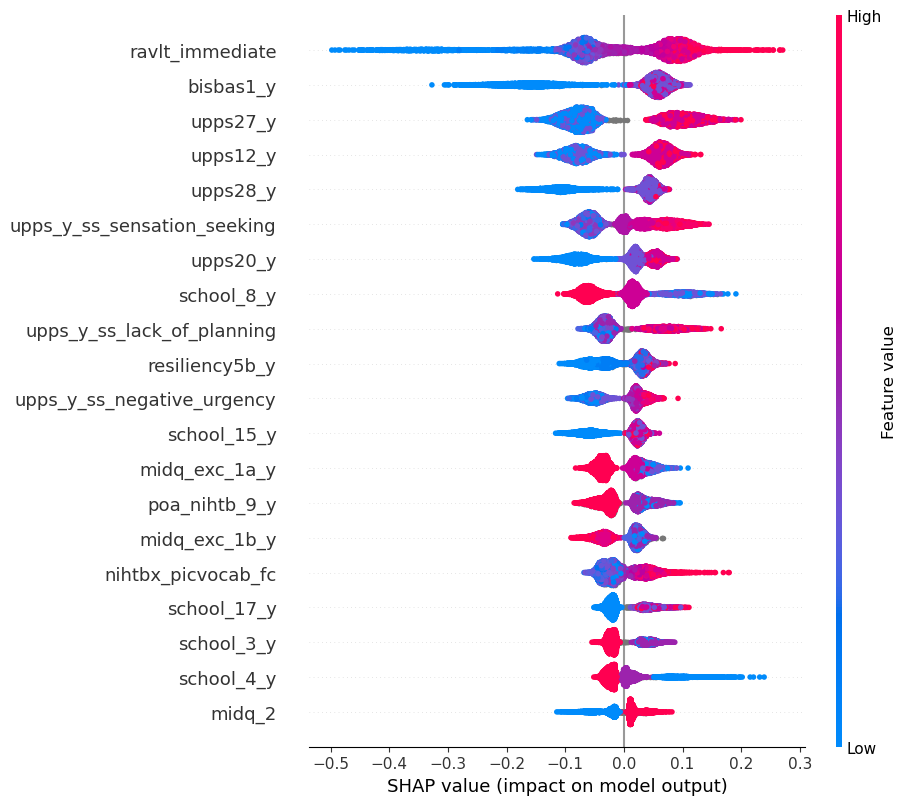

In [32]:
plt.style.use('default')
shap.summary_plot(shap_values, X_display)

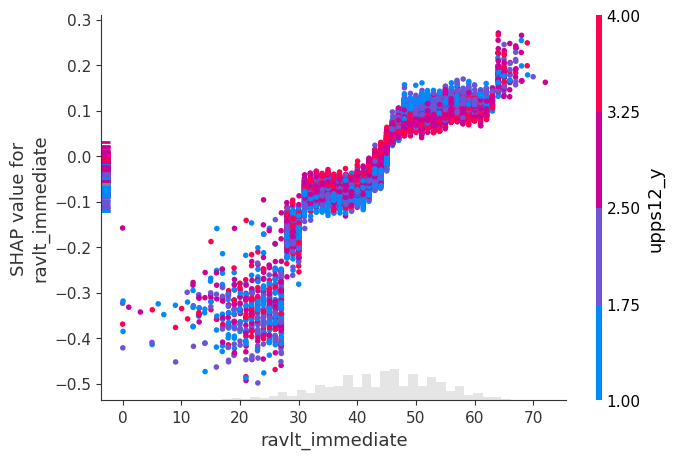

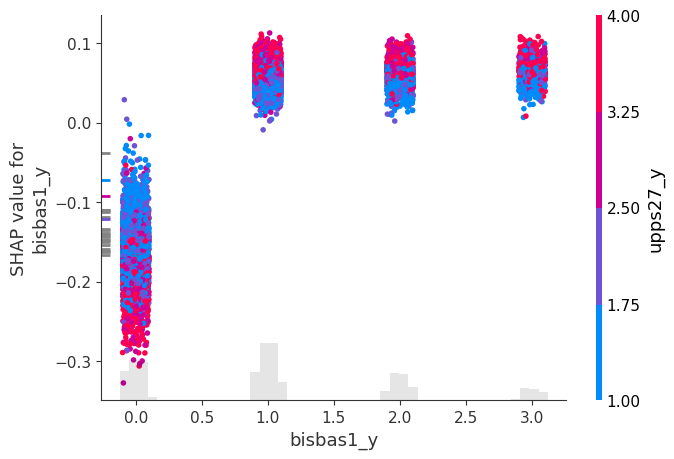

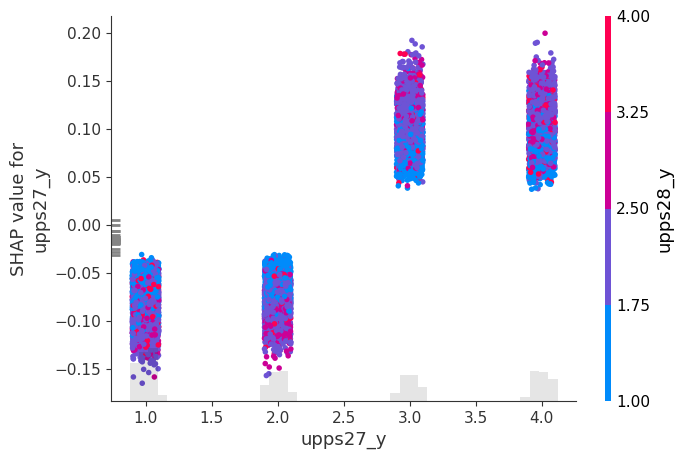

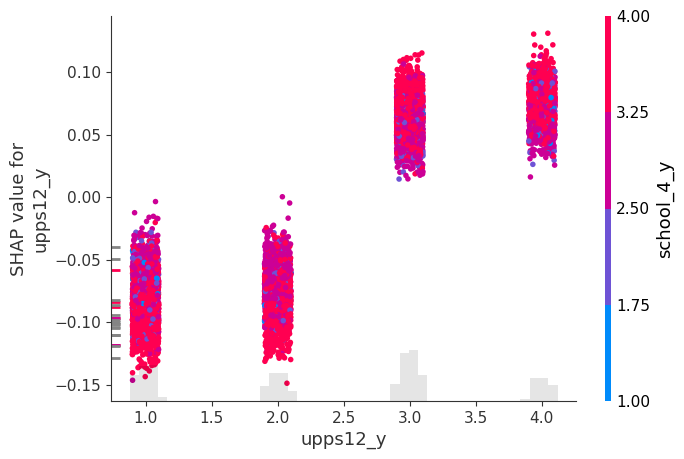

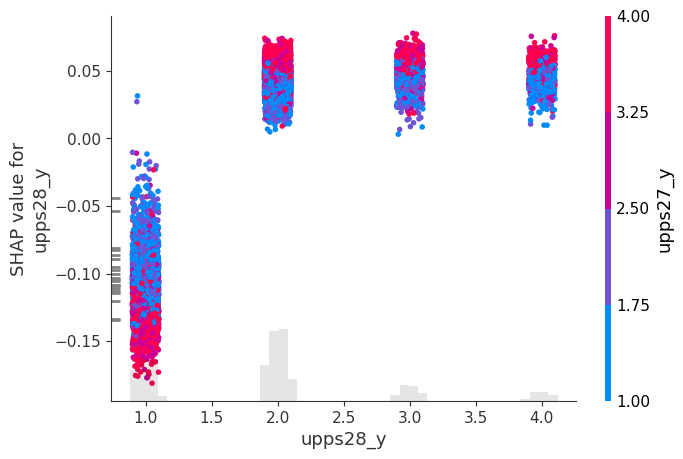

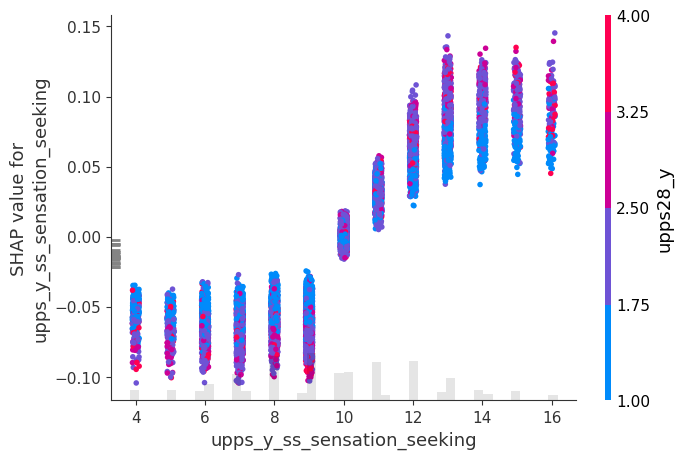

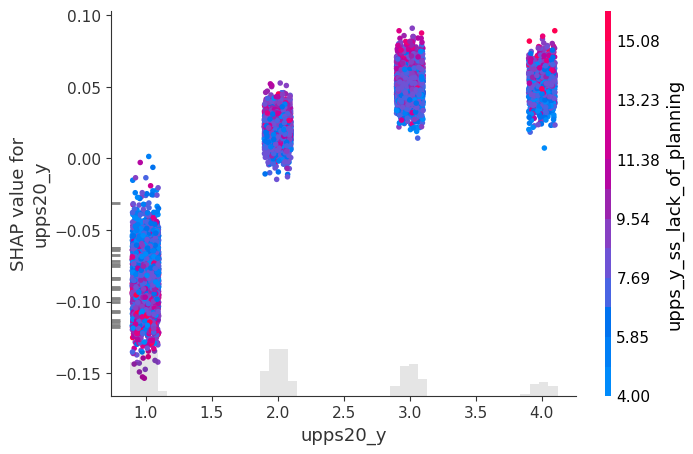

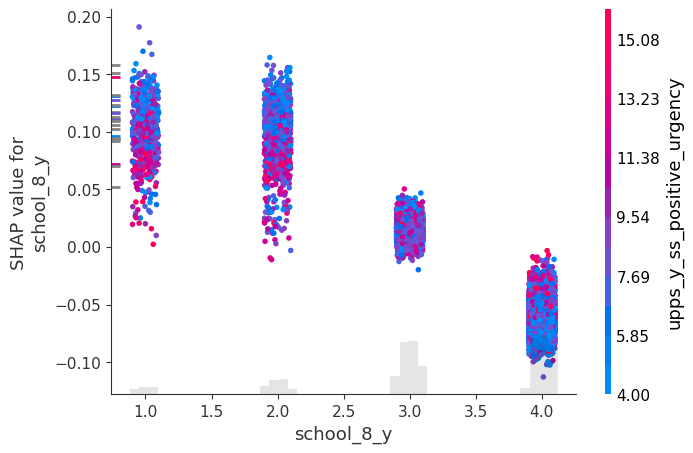

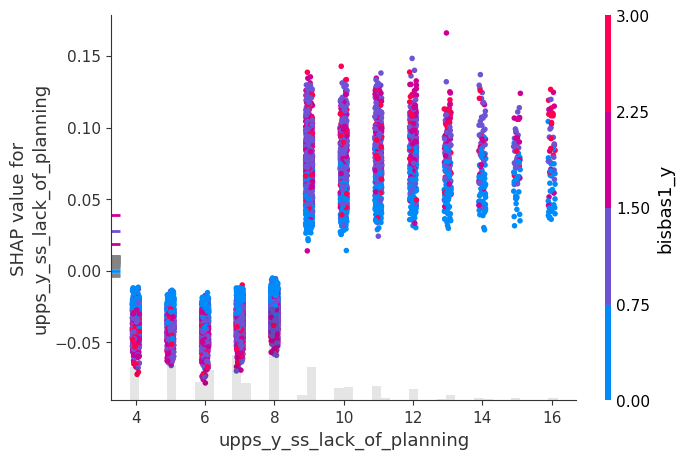

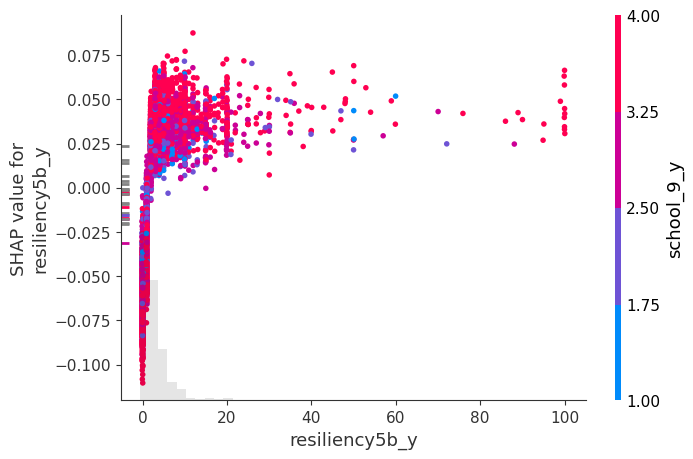

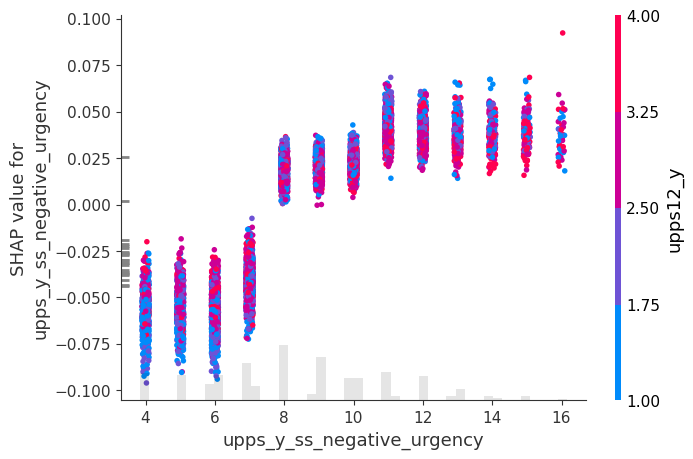

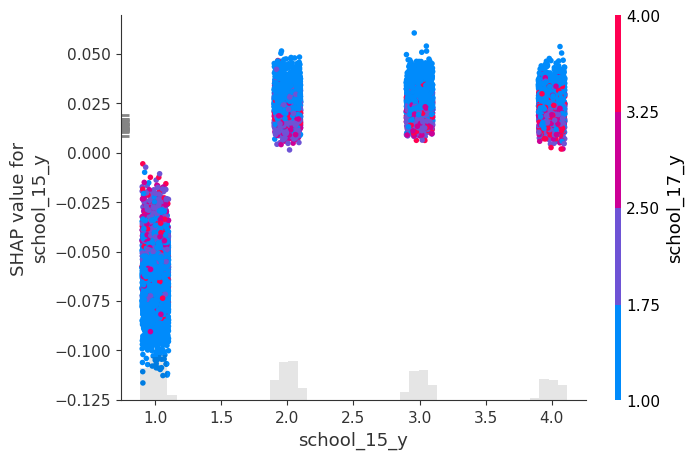

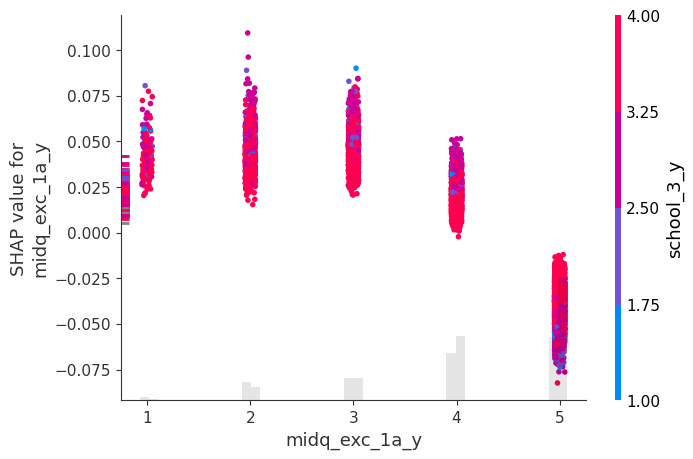

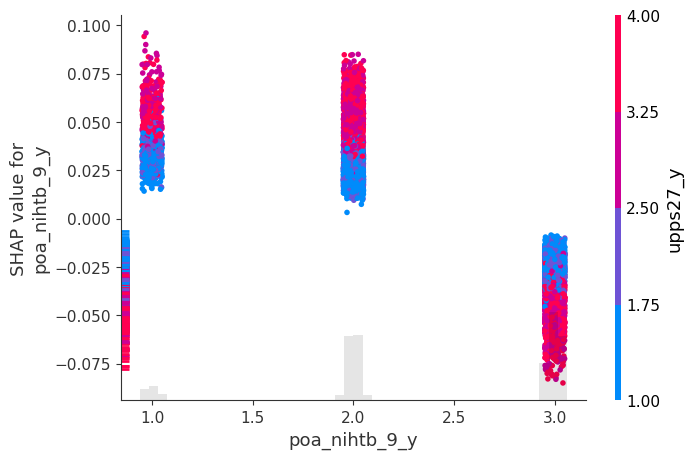

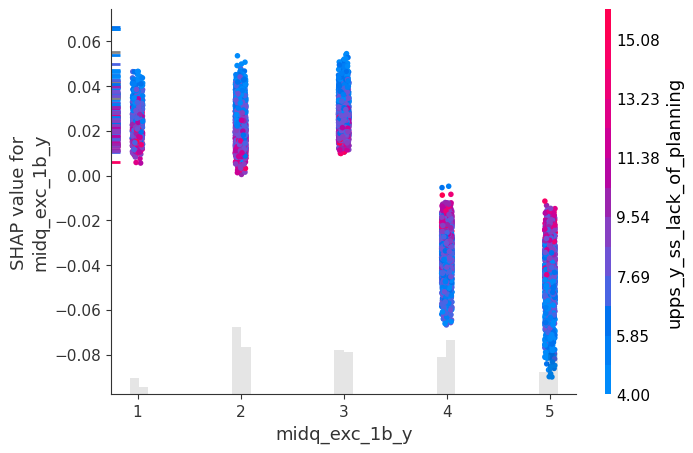

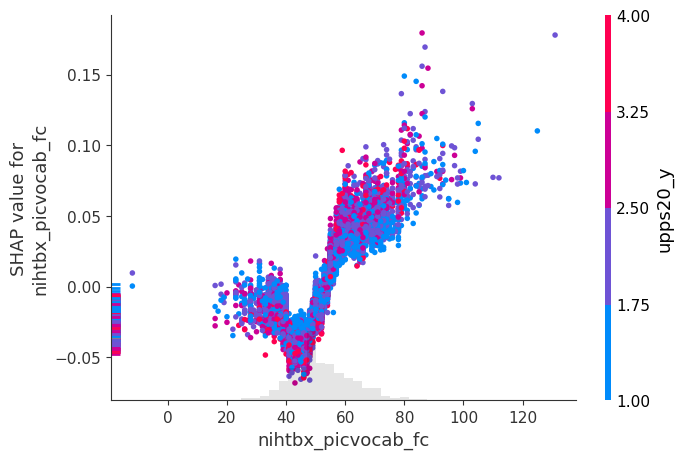

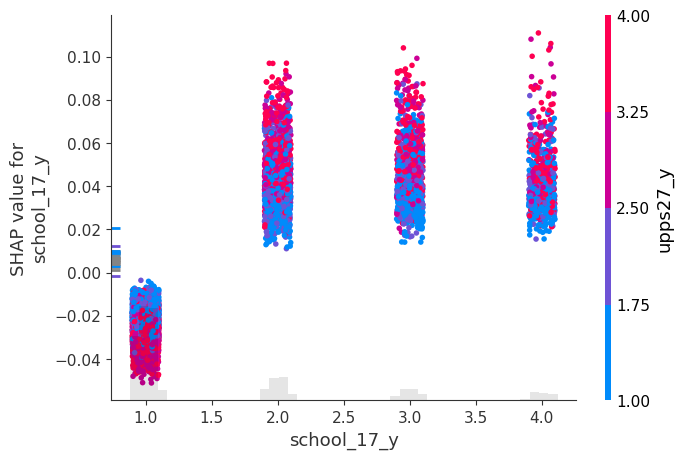

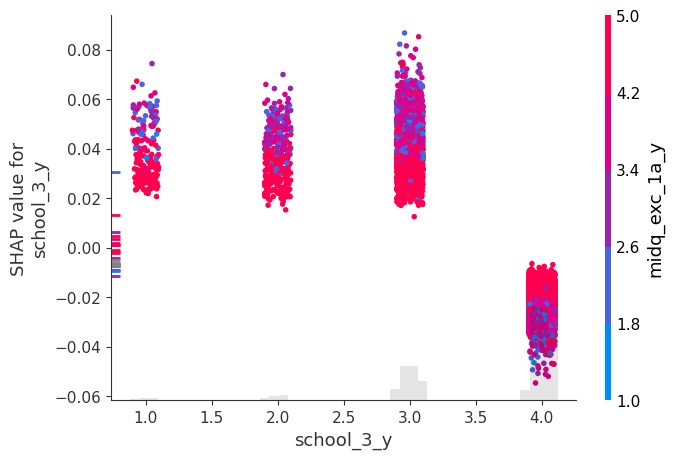

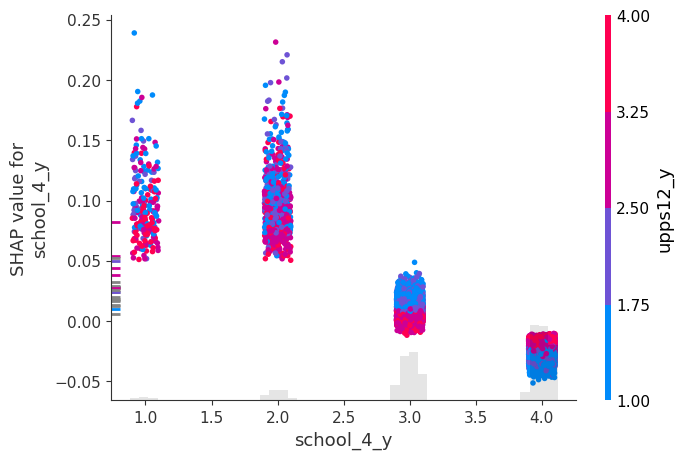

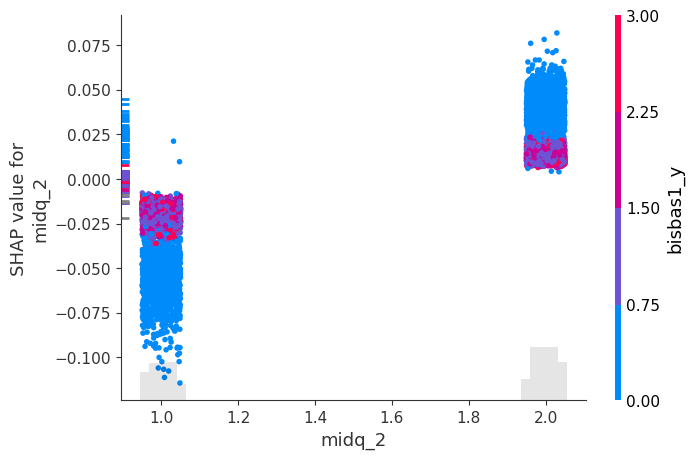

In [33]:
new_api_shap_values = explainer(X)

top_inds = np.argsort(-np.sum(np.abs(new_api_shap_values.values), 0))
for i in range(20):
    shap.plots.scatter(new_api_shap_values[:, top_inds[i]], color=new_api_shap_values)